<a href="https://colab.research.google.com/github/juancolson/Manga-Bounding-Boxes/blob/master/here_there.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib pillow scipy

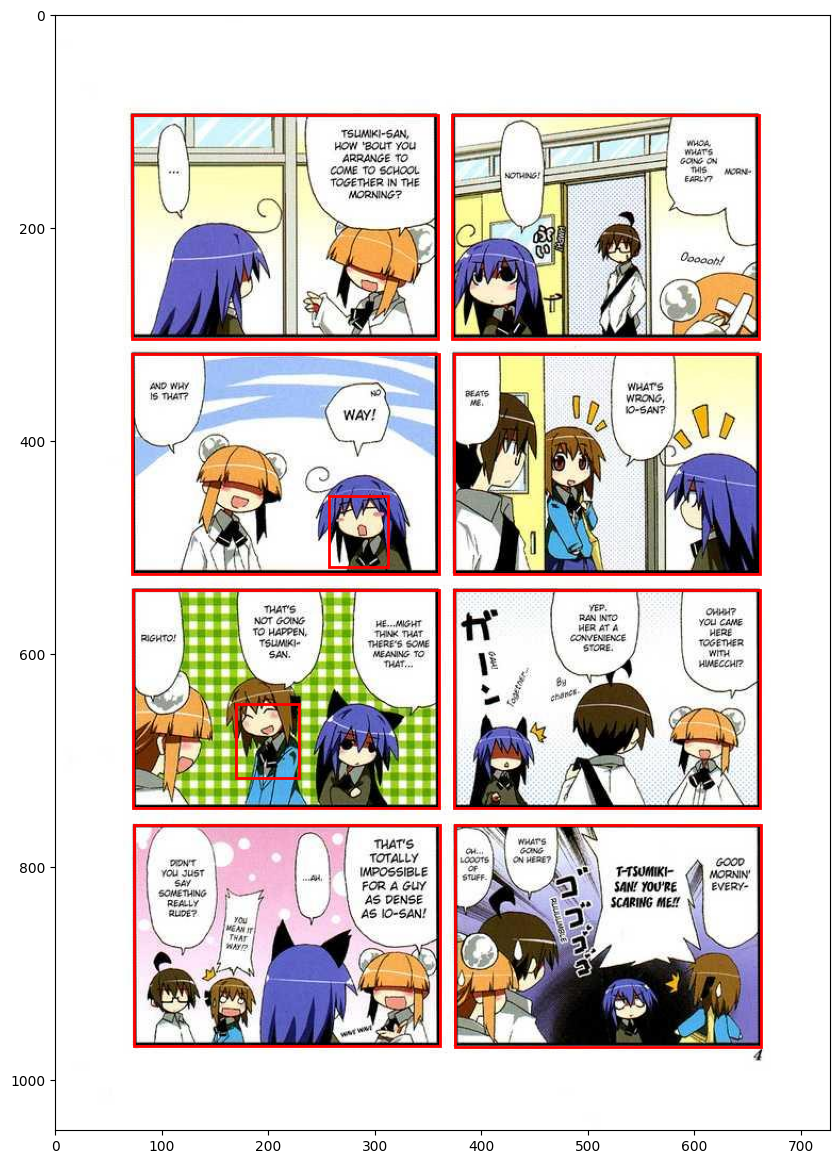

Box 1: Position (x: 72, y: 94), Size: Width 287px, Height 210px
Box 2: Position (x: 373, y: 94), Size: Width 288px, Height 210px
Box 3: Position (x: 72, y: 318), Size: Width 288px, Height 207px
Box 4: Position (x: 374, y: 318), Size: Width 288px, Height 207px
Box 5: Position (x: 257, y: 452), Size: Width 55px, Height 66px
Box 6: Position (x: 73, y: 540), Size: Width 287px, Height 205px
Box 7: Position (x: 374, y: 540), Size: Width 288px, Height 205px
Box 8: Position (x: 170, y: 647), Size: Width 59px, Height 70px
Box 9: Position (x: 74, y: 761), Size: Width 287px, Height 207px
Box 10: Position (x: 375, y: 761), Size: Width 288px, Height 208px


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import label, find_objects

# Load the image
image_path = "/content/0001-010.jpg"  # Update this with the path to your image
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert("L")
gray_array = np.array(gray_image)

# Apply a binary threshold to get a binary image (black and white)
threshold = 50
binary_image = gray_array < threshold

# Function to find bounding boxes of connected components
def find_bounding_boxes(binary_image):
    # Label connected components
    labeled_array, num_features = label(binary_image)

    # Find bounding boxes of each connected component
    slices = find_objects(labeled_array)

    # Extract bounding box coordinates
    boxes = []
    for sl in slices:
        y1, x1 = sl[0].start, sl[1].start
        y2, x2 = sl[0].stop, sl[1].stop
        width = x2 - x1
        height = y2 - y1
        # Ignore boxes with height or width less than 100 px
        if width >= 100 and height >= 100:
            boxes.append((x1, y1, width, height))

    return boxes

# Find bounding boxes of black regions
black_boxes = find_bounding_boxes(binary_image)

# Visualize the bounding boxes on the original image
plt.figure(figsize=(10, 15))
plt.imshow(image)
for (x, y, w, h) in black_boxes:
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=2))
plt.show()

# Print the coordinates and sizes of the detected boxes
for box in black_boxes:
    print(f"Position: (x: {box[0]}, y: {box[1]}), Size: Width {box[2]} px, Height {box[3]} px")